### khaiii

In [ ]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [ ]:
!pip install cmake

In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [ ]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [ ]:
!cd /content/build/ && make resource

Built target resource


In [ ]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/errpatch.len
-- Up-to-date: /usr/local/share/khaiii/errpatch.val
-- Up-to-date: /usr/local/share/khaiii/conv.3.fil
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/conv.4.fil
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/embed.bin
-- Up-to-date: /usr/local/share/khaiii/errpatch.tri
-- Up-to-date: /usr/local/share/khaiii/restore.key
-- Up-to-date: /usr/local/share/khaiii/conv.2.fil
-- Up-to-date: /usr/local

In [ ]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [ ]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22882538 sha256=d57ce6377ce2f7e5573da348c5153cadc1e805902739fa7aabdcaa7100855979
  Stored in directory: /tmp/pip-ephem-wheel-cache-fez7q_e0/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


## preprocessing

In [ ]:
from khaiii import KhaiiiApi
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
api = KhaiiiApi()

def khaiii_tokenized(s):
  result = []
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
DF = pd.read_excel('after_preprocessing_3emotion.xlsx')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60857 entries, 0 to 60856
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  60857 non-null  object
 1   Emotion   60857 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 951.0+ KB


In [ ]:
total_data = pd.DataFrame()

total_data['sentence'] = DF['Sentence']
total_data['emotion'] = DF['Emotion']

In [ ]:
total_data.nunique()

sentence    60533
emotion         3
dtype: int64

In [ ]:
total_data.drop_duplicates(subset=['sentence'], inplace=True) # 중복 데이터 제거

len(total_data)

60533

In [ ]:
print(total_data.isnull().values.any()) # null 값 확인

False


In [ ]:
total_data['emotion'].value_counts()

0    21104
1    19719
2    19710
Name: emotion, dtype: int64

In [ ]:
train_data, validtest = train_test_split(total_data, test_size=0.2,
                                         random_state=2045)

print(len(train_data))
print(len(validtest))

48426
12107


In [ ]:
valid_data, test_data = train_test_split(validtest, test_size=0.3,
                                         random_state=2045)

print(len(valid_data))
print(len(test_data))

8474
3633


In [ ]:
train_data['tokenized'] = train_data['sentence'].apply(khaiii_tokenized)
valid_data['tokenized'] = valid_data['sentence'].apply(khaiii_tokenized)
test_data['tokenized'] = test_data['sentence'].apply(khaiii_tokenized)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['emotion'].values
X_valid = valid_data['tokenized'].values
y_valid = valid_data['emotion'].values
X_test= test_data['tokenized'].values
y_test = test_data['emotion'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27694
등장 빈도가 1번 이하인 희귀 단어의 수: 14367
단어 집합에서 희귀 단어의 비율: 51.87766303170361
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9083736252058872


In [ ]:
vocab_size = total_cnt

print(vocab_size)

27694


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

최대 길이 : 132
평균 길이 : 15.546173543137984


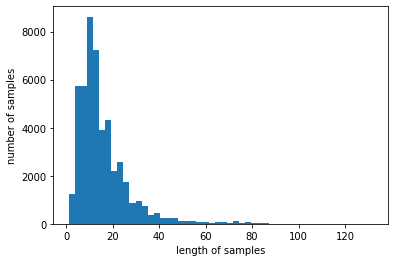

In [ ]:
print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.01552884813944


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
y_train = to_categorical(y_train,3)
y_valid = to_categorical(y_valid,3)
y_test = to_categorical(y_test,3)

In [ ]:
y_train.shape

(48426, 3)

## Word2Vec

In [ ]:
X_train_tokenized = train_data['tokenized'].tolist()

In [ ]:
X_valid_tokenized = valid_data['tokenized'].tolist()

In [ ]:
tokenized_data = X_train_tokenized + X_valid_tokenized

In [ ]:
len(tokenized_data)

56900

In [ ]:
import gensim

word2vec = gensim.models.Word2Vec(sentences=tokenized_data,
                               size=50,
                               window=3,
                               min_count=1,
                               workers=4,
                               sg=1)

In [ ]:
word2vec.wv.vectors.shape

(30226, 50)

In [ ]:
vocab_size = len(tokenizer.index_word) + 1
embedding_dim = 50

embedding_matrix = np.zeros((30226, embedding_dim))

for word, idx in tokenizer.word_index.items():
  embedding_vector = word2vec[word] if word in word2vec else None
  if embedding_vector is not None:
    embedding_matrix[idx] = embedding_vector

embedding_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(30226, 50)

In [ ]:
embedding_matrix.shape

(30226, 50)

## modeling

> ## 1) Define


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers

In [ ]:
from keras import backend as K

K.clear_session()

(1) Case1 : Stacked_Layer 

- 중간 Layer에 'return_sequences = True' 조건 필요

In [ ]:
model1 = Sequential()
model1.add(Embedding(30226, embedding_dim))
model1.add(Bidirectional(LSTM(128, return_sequences=True)))
model1.add(LSTM(128, return_sequences = True))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dense(3, activation='softmax'))

In [ ]:
model1.layers[0].set_weights([embedding_matrix])
model1.layers[0].trainable=False
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         183296    
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,990,919
Trainable params: 479,619
Non-trainable params: 1,511,300
_________________________________________________________________


(2) Case2 : Dropout(Kernel_Regularizer) 



In [ ]:
model2 = Sequential()
model2.add(Embedding(30226, embedding_dim))
model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(Dropout(0.5))
model2.add(LSTM(128))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))

In [ ]:
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable=False
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 256)         183296    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,892,103
Trainable params: 380,803
Non-trainable params: 1,511,300
______________________________________

(3) Case3 : Dropout(Kernel_Regularizer) +  Stacked_Layer

In [ ]:
model3 = Sequential()
model3.add(Embedding(30226, embedding_dim))
model3.add(Bidirectional(LSTM(128, return_sequences=True)))
model3.add(Dropout(0.5))
model3.add(LSTM(128, return_sequences = True))
model3.add(Dropout(0.5))
model3.add(Bidirectional(LSTM(64)))
model3.add(Dropout(0.5))
model3.add(Dense(3, activation='softmax'))

In [ ]:
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable=False
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 256)         183296    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

(4) Case4 : Batch_Normalization(Kernel_Regularizer) + Stacked_Layer

In [ ]:
model4 = Sequential()
model4.add(Embedding(30226, embedding_dim))
model4.add(Bidirectional(LSTM(128, return_sequences=True)))
model4.add(layers.BatchNormalization())
model4.add(LSTM(128, return_sequences = True))
model4.add(layers.BatchNormalization())
model4.add(Bidirectional(LSTM(64)))
model4.add(layers.BatchNormalization())
model4.add(Dense(3, activation='softmax'))

In [ ]:
model4.layers[0].set_weights([embedding_matrix])
model4.layers[0].trainable=False
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 256)         183296    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 256)         1024      
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 128)         512       
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               98816     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

(5) Case5 : L2(Kernel_Regularizer)  + Stacked_Layer

In [ ]:
model5 = Sequential()
model5.add(Embedding(30226, embedding_dim))
model5.add(Bidirectional(LSTM(128, 
                              kernel_regularizer = regularizers.l2(0.00001),
                              return_sequences=True)))
model5.add(LSTM(128, 
                kernel_regularizer = regularizers.l2(0.00001),
                return_sequences = True))
model5.add(Bidirectional(LSTM(64,
                              kernel_regularizer = regularizers.l2(0.00001))))
model5.add(Dense(3, activation='softmax'))

In [ ]:
model5.layers[0].set_weights([embedding_matrix])
model5.layers[0].trainable=False
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, None, 256)         183296    
_________________________________________________________________
lstm_17 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 1,990,919
Trainable params: 479,619
Non-trainable params: 1,511,300
_________________________________________________________________


(6) Case6 : Batch & Dropout(Kernel_Regularizer) + Stacked_Layer

In [ ]:
model6 = Sequential()
model6.add(Embedding(30226, embedding_dim))
model6.add(Bidirectional(LSTM(128, return_sequences=True)))
model6.add(Dropout(0.5))
model6.add(layers.BatchNormalization())
model6.add(LSTM(128, return_sequences = True))
model6.add(Dropout(0.5))
model6.add(layers.BatchNormalization())
model6.add(Bidirectional(LSTM(64)))
model6.add(Dropout(0.5))
model6.add(layers.BatchNormalization())
model6.add(Dense(3, activation='softmax'))

In [ ]:
model6.layers[0].set_weights([embedding_matrix])
model6.layers[0].trainable=False
model6.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 256)         183296    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 256)         1024      
_________________________________________________________________
lstm_20 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 128)        

(7) Case7 : Batch & L2(Kernel_Regularizer) + Stacked_Layer

In [ ]:
model7 = Sequential()
model7.add(Embedding(30226, embedding_dim))
model7.add(Bidirectional(LSTM(128, 
                              kernel_regularizer = regularizers.l2(0.00001),
                              return_sequences=True)))
model7.add(layers.BatchNormalization())
model7.add(LSTM(128, 
                kernel_regularizer = regularizers.l2(0.00001),
                return_sequences = True))
model7.add(layers.BatchNormalization())
model7.add(Bidirectional(LSTM(64,
                              kernel_regularizer = regularizers.l2(0.00001))))
model7.add(layers.BatchNormalization())
model7.add(Dense(3, activation='softmax'))

In [ ]:
model7.layers[0].set_weights([embedding_matrix])
model7.layers[0].trainable=False
model7.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_16 (Bidirectio (None, None, 256)         183296    
_________________________________________________________________
batch_normalization_8 (Batch (None, None, 256)         1024      
_________________________________________________________________
lstm_26 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 128)         512       
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 128)               98816     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)             

(8) Case8 : Dropout & L2(Kernel_Regularizer)  + Stacked_Layer

In [ ]:
model8 = Sequential()
model8.add(Embedding(30226, embedding_dim))
model8.add(Bidirectional(LSTM(128, 
                              kernel_regularizer = regularizers.l2(0.00001),
                              return_sequences=True)))
model8.add(Dropout(0.5))
model8.add(LSTM(128, 
                kernel_regularizer = regularizers.l2(0.00001),
                return_sequences = True))
model8.add(Dropout(0.5))
model8.add(Bidirectional(LSTM(64,
                             kernel_regularizer = regularizers.l2(0.00001))))
model8.add(Dropout(0.5))
model8.add(Dense(3, activation='softmax'))

In [ ]:
model8.layers[0].set_weights([embedding_matrix])
model8.layers[0].trainable=False
model8.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_18 (Bidirectio (None, None, 256)         183296    
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
lstm_29 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

(9) Case9 : Dropout & L2 & Batch(Kernel_Regularizer) + Stacked_Layer

In [ ]:
model9 = Sequential()
model9.add(Embedding(30226, embedding_dim))
model9.add(Bidirectional(LSTM(128, 
                              kernel_regularizer = regularizers.l2(0.00001),
                              return_sequences=True)))
model9.add(Dropout(0.5))
model9.add(layers.BatchNormalization())
model9.add(LSTM(128, 
                kernel_regularizer = regularizers.l2(0.00001),
                return_sequences = True))
model9.add(Dropout(0.4))
model9.add(layers.BatchNormalization())
model9.add(Bidirectional(LSTM(64,
                             kernel_regularizer = regularizers.l2(0.00001))))
model9.add(Dropout(0.3))
model9.add(layers.BatchNormalization())
model9.add(Dense(3, activation='softmax'))

In [ ]:
model9.layers[0].set_weights([embedding_matrix])
model9.layers[0].trainable=False
model9.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_20 (Bidirectio (None, None, 256)         183296    
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
batch_normalization_11 (Batc (None, None, 256)         1024      
_________________________________________________________________
lstm_32 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
dropout_14 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, None, 128)       

In [ ]:
model10 = Sequential()
model10.add(Embedding(30226, embedding_dim))
model10.add(Bidirectional(LSTM(128, return_sequences=True)))
model10.add(Dropout(0.6))
model10.add(LSTM(128, return_sequences = True))
model10.add(Dropout(0.6))
model10.add(Bidirectional(LSTM(64)))
model10.add(Dropout(0.6))
model10.add(Dense(3, activation='softmax'))

In [ ]:
model10.layers[0].set_weights([embedding_matrix])
model10.layers[0].trainable=False
model10.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 50)          1511300   
_________________________________________________________________
bidirectional_24 (Bidirectio (None, None, 256)         183296    
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
lstm_38 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)             

> ### 2) Compile

In [ ]:
model1.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model2.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model3.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model4.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model5.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model6.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model7.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model8.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model9.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model10.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()

- ModelCheckpoint 이름 바꿔가면서 진행
   - 


In [ ]:
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=10)
mc = ModelCheckpoint('BiLSTM_model_10.h5', 
                     monitor='val_acc', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

> ### 4) Fit



- Case1 : Stacked_Layer + return_sequences = True
  - val_accuary:0.7660
  - 약 3분 

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 47s 27ms/step - loss: 0.8369 - accuracy: 0.6096 - val_loss: 0.6709 - val_accuracy: 0.7053


Epoch 2/50
346/346 [==============================] - 8s 23ms/step - loss: 0.6717 - accuracy: 0.7118 - val_loss: 0.6203 - val_accuracy: 0.7329


Epoch 3/50
346/346 [==============================] - 8s 23ms/step - loss: 0.6309 - accuracy: 0.7328 - val_loss: 0.6124 - val_accuracy: 0.7414


Epoch 4/50
346/346 [==============================] - 8s 23ms/step - loss: 0.6057 - accuracy: 0.7461 - val_loss: 0.5791 - val_accuracy: 0.7588


Epoch 5/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5890 - accuracy: 0.7538 - val_loss: 0.5882 - val_accuracy: 0.7558


Epoch 6/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5720 - accuracy: 0.7632 - val_loss: 0.5696 - val_accuracy: 0.7629


Epoch 7/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5622 - accuracy: 0.7671 - val_loss: 0.5728 - val_accuracy: 0.7619


Epoch 8/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5470 - accuracy: 0.7719 - val_loss: 0.5812 - val_accuracy: 0.7634


Epoch 9/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5328 - accuracy: 0.7771 - val_loss: 0.5675 - val_accuracy: 0.7646


Epoch 10/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5266 - accuracy: 0.7805 - val_loss: 0.5632 - val_accuracy: 0.7658


Epoch 11/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5126 - accuracy: 0.7866 - val_loss: 0.5816 - val_accuracy: 0.7555


Epoch 12/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4958 - accuracy: 0.7940 - val_loss: 0.5720 - val_accuracy: 0.7594


Epoch 13/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4794 - accuracy: 0.8008 - val_loss: 0.5725 - val_accuracy: 0.7660


Epoch 14/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4662 - accuracy: 0.8047 - val_loss: 0.5758 - val_accuracy: 0.7633


Epoch 15/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4473 - accuracy: 0.8147 - val_loss: 0.5837 - val_accuracy: 0.7622


Epoch 16/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4279 - accuracy: 0.8222 - val_loss: 0.6133 - val_accuracy: 0.7595


Epoch 17/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4022 - accuracy: 0.8334 - val_loss: 0.6185 - val_accuracy: 0.7557


Epoch 18/50
346/346 [==============================] - 8s 23ms/step - loss: 0.3729 - accuracy: 0.8450 - val_loss: 0.6609 - val_accuracy: 0.7571


Epoch 19/50
346/346 [==============================] - 8s 23ms/step - loss: 0.3577 - accuracy: 0.8515 - val_loss: 0.6973 - val_accuracy: 0.7537


Epoch 20/50
346/346 [==============================] - 8s 23ms/step - loss: 0.3314 - accuracy: 0.8617 - val_loss: 0.7195 - val_accuracy: 0.7412


Epoch 00020: early stopping


- Case2 : Dropout(Kernel_Regularizer) 

  - val_accuary: 0.7755
  - 약 3분

In [ ]:
%%time
history2 = model2.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 11s 20ms/step - loss: 0.8271 - accuracy: 0.6142 - val_loss: 0.6680 - val_accuracy: 0.7069


Epoch 2/50
346/346 [==============================] - 6s 17ms/step - loss: 0.6795 - accuracy: 0.7072 - val_loss: 0.6178 - val_accuracy: 0.7435


Epoch 3/50
346/346 [==============================] - 6s 17ms/step - loss: 0.6428 - accuracy: 0.7286 - val_loss: 0.6146 - val_accuracy: 0.7407


Epoch 4/50
346/346 [==============================] - 6s 17ms/step - loss: 0.6275 - accuracy: 0.7407 - val_loss: 0.6007 - val_accuracy: 0.7481


Epoch 5/50
346/346 [==============================] - 6s 17ms/step - loss: 0.6111 - accuracy: 0.7453 - val_loss: 0.5821 - val_accuracy: 0.7632


Epoch 6/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5933 - accuracy: 0.7508 - val_loss: 0.6121 - val_accuracy: 0.7463


Epoch 7/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5826 - accuracy: 0.7582 - val_loss: 0.5730 - val_accuracy: 0.7600


Epoch 8/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5713 - accuracy: 0.7639 - val_loss: 0.5614 - val_accuracy: 0.7701


Epoch 9/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5734 - accuracy: 0.7624 - val_loss: 0.5658 - val_accuracy: 0.7656


Epoch 10/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5627 - accuracy: 0.7653 - val_loss: 0.5805 - val_accuracy: 0.7576


Epoch 11/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5476 - accuracy: 0.7716 - val_loss: 0.5640 - val_accuracy: 0.7653


Epoch 12/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5423 - accuracy: 0.7734 - val_loss: 0.5676 - val_accuracy: 0.7615


Epoch 13/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5367 - accuracy: 0.7772 - val_loss: 0.5833 - val_accuracy: 0.7586


Epoch 14/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5279 - accuracy: 0.7787 - val_loss: 0.5568 - val_accuracy: 0.7711


Epoch 15/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5199 - accuracy: 0.7870 - val_loss: 0.5573 - val_accuracy: 0.7698


Epoch 16/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5126 - accuracy: 0.7871 - val_loss: 0.5810 - val_accuracy: 0.7660


Epoch 17/50
346/346 [==============================] - 6s 17ms/step - loss: 0.5124 - accuracy: 0.7879 - val_loss: 0.5750 - val_accuracy: 0.7676


Epoch 18/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4942 - accuracy: 0.7953 - val_loss: 0.5615 - val_accuracy: 0.7707


Epoch 19/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4918 - accuracy: 0.7971 - val_loss: 0.5792 - val_accuracy: 0.7753


Epoch 20/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4790 - accuracy: 0.8011 - val_loss: 0.5742 - val_accuracy: 0.7735


Epoch 21/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4743 - accuracy: 0.8024 - val_loss: 0.5687 - val_accuracy: 0.7755


Epoch 22/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4712 - accuracy: 0.8064 - val_loss: 0.5794 - val_accuracy: 0.7659


Epoch 23/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4524 - accuracy: 0.8112 - val_loss: 0.5749 - val_accuracy: 0.7711


Epoch 24/50
346/346 [==============================] - 6s 17ms/step - loss: 0.4453 - accuracy: 0.8162 - val_loss: 0.6002 - val_accuracy: 0.7721


Epoch 00024: early stopping
CPU times: user 2min 34s, sys: 16 s, total: 2min 50s
Wall time: 2min 25s


- Case3 : Dropout(Kernel_Regularizer) + Stacked_Layer

  - val_accuary: 0.7704
  - 약 2분

In [ ]:
%%time
history3 = model3.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 16s 28ms/step - loss: 0.8430 - accuracy: 0.6004 - val_loss: 0.7095 - val_accuracy: 0.6798


Epoch 2/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6908 - accuracy: 0.7031 - val_loss: 0.6419 - val_accuracy: 0.7245


Epoch 3/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6491 - accuracy: 0.7252 - val_loss: 0.6168 - val_accuracy: 0.7363


Epoch 4/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6329 - accuracy: 0.7343 - val_loss: 0.6004 - val_accuracy: 0.7486


Epoch 5/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6155 - accuracy: 0.7444 - val_loss: 0.5786 - val_accuracy: 0.7629


Epoch 6/50
346/346 [==============================] - 9s 25ms/step - loss: 0.6019 - accuracy: 0.7510 - val_loss: 0.6262 - val_accuracy: 0.7311


Epoch 7/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5891 - accuracy: 0.7557 - val_loss: 0.5670 - val_accuracy: 0.7666


Epoch 8/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5783 - accuracy: 0.7614 - val_loss: 0.5677 - val_accuracy: 0.7608


Epoch 9/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5665 - accuracy: 0.7677 - val_loss: 0.5617 - val_accuracy: 0.7653


Epoch 10/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5618 - accuracy: 0.7686 - val_loss: 0.5808 - val_accuracy: 0.7548


Epoch 11/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5538 - accuracy: 0.7700 - val_loss: 0.5706 - val_accuracy: 0.7701


Epoch 12/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5448 - accuracy: 0.7750 - val_loss: 0.5659 - val_accuracy: 0.7695


Epoch 13/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5373 - accuracy: 0.7772 - val_loss: 0.5635 - val_accuracy: 0.7652


Epoch 14/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5274 - accuracy: 0.7822 - val_loss: 0.5683 - val_accuracy: 0.7627


Epoch 15/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5267 - accuracy: 0.7816 - val_loss: 0.5629 - val_accuracy: 0.7704


Epoch 16/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5166 - accuracy: 0.7881 - val_loss: 0.5785 - val_accuracy: 0.7607


Epoch 17/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5035 - accuracy: 0.7929 - val_loss: 0.5713 - val_accuracy: 0.7678


Epoch 18/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4978 - accuracy: 0.7936 - val_loss: 0.5763 - val_accuracy: 0.7694


Epoch 19/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4871 - accuracy: 0.7980 - val_loss: 0.5857 - val_accuracy: 0.7685


Epoch 00019: early stopping
CPU times: user 3min 3s, sys: 17.5 s, total: 3min 21s
Wall time: 2min 45s


- Case4 : Batch_Normalization(Kernel_Regularizer) + Stacked_Layer

  - val_accuary: 0.7623
  - 약 2분 

In [ ]:
%%time
history4 = model4.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 17s 31ms/step - loss: 0.8034 - accuracy: 0.6555 - val_loss: 0.7992 - val_accuracy: 0.6673


Epoch 2/50
346/346 [==============================] - 9s 26ms/step - loss: 0.6200 - accuracy: 0.7403 - val_loss: 0.6370 - val_accuracy: 0.7242


Epoch 3/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5872 - accuracy: 0.7548 - val_loss: 0.6035 - val_accuracy: 0.7431


Epoch 4/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5556 - accuracy: 0.7733 - val_loss: 0.6022 - val_accuracy: 0.7547


Epoch 5/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5285 - accuracy: 0.7814 - val_loss: 0.5698 - val_accuracy: 0.7623


Epoch 6/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5133 - accuracy: 0.7883 - val_loss: 0.5772 - val_accuracy: 0.7623


Epoch 7/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4866 - accuracy: 0.7985 - val_loss: 0.5997 - val_accuracy: 0.7502


Epoch 8/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4511 - accuracy: 0.8154 - val_loss: 0.5996 - val_accuracy: 0.7547


Epoch 9/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4262 - accuracy: 0.8277 - val_loss: 0.6221 - val_accuracy: 0.7535


Epoch 10/50
346/346 [==============================] - 9s 26ms/step - loss: 0.3883 - accuracy: 0.8424 - val_loss: 0.6314 - val_accuracy: 0.7553


Epoch 11/50
346/346 [==============================] - 9s 26ms/step - loss: 0.3505 - accuracy: 0.8614 - val_loss: 0.6855 - val_accuracy: 0.7499


Epoch 12/50
346/346 [==============================] - 9s 26ms/step - loss: 0.3109 - accuracy: 0.8761 - val_loss: 0.7330 - val_accuracy: 0.7435


Epoch 13/50
346/346 [==============================] - 9s 26ms/step - loss: 0.2738 - accuracy: 0.8946 - val_loss: 0.7496 - val_accuracy: 0.7366


Epoch 14/50
346/346 [==============================] - 9s 26ms/step - loss: 0.2472 - accuracy: 0.9056 - val_loss: 0.8283 - val_accuracy: 0.7437


Epoch 15/50
346/346 [==============================] - 9s 26ms/step - loss: 0.2075 - accuracy: 0.9206 - val_loss: 0.9122 - val_accuracy: 0.7334


Epoch 00015: early stopping
CPU times: user 2min 41s, sys: 16.2 s, total: 2min 57s
Wall time: 2min 24s


- Case5 : L2(Kernel_Regularizer)  + Stacked_Layer

  - val_accuary: 0.7689
  - 약 3분

In [ ]:
%%time
history5 = model5.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 16s 28ms/step - loss: 0.8433 - accuracy: 0.6083 - val_loss: 0.6719 - val_accuracy: 0.7117


Epoch 2/50
346/346 [==============================] - 8s 23ms/step - loss: 0.6814 - accuracy: 0.7086 - val_loss: 0.6498 - val_accuracy: 0.7301


Epoch 3/50
346/346 [==============================] - 8s 23ms/step - loss: 0.6364 - accuracy: 0.7333 - val_loss: 0.6313 - val_accuracy: 0.7400


Epoch 4/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6152 - accuracy: 0.7454 - val_loss: 0.6013 - val_accuracy: 0.7561


Epoch 5/50
346/346 [==============================] - 8s 23ms/step - loss: 0.6039 - accuracy: 0.7512 - val_loss: 0.6150 - val_accuracy: 0.7505


Epoch 6/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5862 - accuracy: 0.7583 - val_loss: 0.6223 - val_accuracy: 0.7424


Epoch 7/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5783 - accuracy: 0.7576 - val_loss: 0.5802 - val_accuracy: 0.7667


Epoch 8/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5588 - accuracy: 0.7719 - val_loss: 0.5860 - val_accuracy: 0.7643


Epoch 9/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5490 - accuracy: 0.7730 - val_loss: 0.5975 - val_accuracy: 0.7582


Epoch 10/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5411 - accuracy: 0.7789 - val_loss: 0.5739 - val_accuracy: 0.7685


Epoch 11/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5323 - accuracy: 0.7829 - val_loss: 0.5778 - val_accuracy: 0.7669


Epoch 12/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5216 - accuracy: 0.7851 - val_loss: 0.5828 - val_accuracy: 0.7642


Epoch 13/50
346/346 [==============================] - 8s 23ms/step - loss: 0.5079 - accuracy: 0.7928 - val_loss: 0.5928 - val_accuracy: 0.7680


Epoch 14/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4903 - accuracy: 0.8017 - val_loss: 0.5871 - val_accuracy: 0.7689


Epoch 15/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4765 - accuracy: 0.8062 - val_loss: 0.6244 - val_accuracy: 0.7610


Epoch 16/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4613 - accuracy: 0.8163 - val_loss: 0.6130 - val_accuracy: 0.7641


Epoch 17/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4401 - accuracy: 0.8227 - val_loss: 0.6264 - val_accuracy: 0.7569


Epoch 18/50
346/346 [==============================] - 8s 23ms/step - loss: 0.4136 - accuracy: 0.8371 - val_loss: 0.6534 - val_accuracy: 0.7575


Epoch 19/50
346/346 [==============================] - 8s 23ms/step - loss: 0.3996 - accuracy: 0.8409 - val_loss: 0.6585 - val_accuracy: 0.7584


Epoch 20/50
346/346 [==============================] - 8s 23ms/step - loss: 0.3807 - accuracy: 0.8503 - val_loss: 0.6972 - val_accuracy: 0.7551


Epoch 00020: early stopping
CPU times: user 3min 12s, sys: 18.5 s, total: 3min 31s
Wall time: 2min 50s


- Case6 : Batch & Dropout(Kernel_Regularizer) + Stacked_Layer

  - val_accuary: 0.7747
  - 약 4분 

In [ ]:
%%time
history6 = model6.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 17s 31ms/step - loss: 0.9171 - accuracy: 0.6061 - val_loss: 0.7101 - val_accuracy: 0.6762


Epoch 2/50
346/346 [==============================] - 9s 26ms/step - loss: 0.6811 - accuracy: 0.7058 - val_loss: 0.6385 - val_accuracy: 0.7302


Epoch 3/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6385 - accuracy: 0.7301 - val_loss: 0.7065 - val_accuracy: 0.7108


Epoch 4/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6073 - accuracy: 0.7481 - val_loss: 0.6100 - val_accuracy: 0.7444


Epoch 5/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6021 - accuracy: 0.7507 - val_loss: 0.6445 - val_accuracy: 0.7433


Epoch 6/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5882 - accuracy: 0.7570 - val_loss: 0.5787 - val_accuracy: 0.7635


Epoch 7/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5810 - accuracy: 0.7588 - val_loss: 0.5939 - val_accuracy: 0.7581


Epoch 8/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5760 - accuracy: 0.7621 - val_loss: 0.6142 - val_accuracy: 0.7426


Epoch 9/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5643 - accuracy: 0.7663 - val_loss: 0.5862 - val_accuracy: 0.7554


Epoch 10/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5534 - accuracy: 0.7738 - val_loss: 0.5791 - val_accuracy: 0.7650


Epoch 11/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5498 - accuracy: 0.7730 - val_loss: 0.5983 - val_accuracy: 0.7538


Epoch 12/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5408 - accuracy: 0.7771 - val_loss: 0.5818 - val_accuracy: 0.7628


Epoch 13/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5363 - accuracy: 0.7777 - val_loss: 0.6065 - val_accuracy: 0.7667


Epoch 14/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5281 - accuracy: 0.7831 - val_loss: 0.5576 - val_accuracy: 0.7747


Epoch 15/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5187 - accuracy: 0.7852 - val_loss: 0.5764 - val_accuracy: 0.7636


Epoch 16/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5167 - accuracy: 0.7876 - val_loss: 0.5657 - val_accuracy: 0.7721


Epoch 17/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5000 - accuracy: 0.7922 - val_loss: 0.5935 - val_accuracy: 0.7707


Epoch 18/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4987 - accuracy: 0.7958 - val_loss: 0.5704 - val_accuracy: 0.7688


Epoch 19/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4917 - accuracy: 0.7992 - val_loss: 0.5797 - val_accuracy: 0.7612


Epoch 20/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4901 - accuracy: 0.7982 - val_loss: 0.5843 - val_accuracy: 0.7639


Epoch 21/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4797 - accuracy: 0.8007 - val_loss: 0.5918 - val_accuracy: 0.7641


Epoch 22/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4702 - accuracy: 0.8075 - val_loss: 0.5859 - val_accuracy: 0.7686


Epoch 23/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4750 - accuracy: 0.8024 - val_loss: 0.5818 - val_accuracy: 0.7650


Epoch 24/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4703 - accuracy: 0.8062 - val_loss: 0.5731 - val_accuracy: 0.7673


Epoch 00024: early stopping
CPU times: user 4min 15s, sys: 27.4 s, total: 4min 42s
Wall time: 3min 49s


- Case7 : Batch & L2(Kernel_Regularizer) + Stacked_Layer

  - val_accuary: 0.7684
  - 약 3분 

In [ ]:
%%time
history7 = model7.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 18s 31ms/step - loss: 0.8030 - accuracy: 0.6605 - val_loss: 0.8567 - val_accuracy: 0.5755


Epoch 2/50
346/346 [==============================] - 9s 26ms/step - loss: 0.6297 - accuracy: 0.7394 - val_loss: 0.7046 - val_accuracy: 0.6961


Epoch 3/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6005 - accuracy: 0.7527 - val_loss: 0.7393 - val_accuracy: 0.6862


Epoch 4/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5863 - accuracy: 0.7621 - val_loss: 0.6137 - val_accuracy: 0.7501


Epoch 5/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5579 - accuracy: 0.7723 - val_loss: 0.6643 - val_accuracy: 0.7387


Epoch 6/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5342 - accuracy: 0.7839 - val_loss: 0.6048 - val_accuracy: 0.7549


Epoch 7/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5156 - accuracy: 0.7906 - val_loss: 0.6257 - val_accuracy: 0.7438


Epoch 8/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4845 - accuracy: 0.8065 - val_loss: 0.6067 - val_accuracy: 0.7554


Epoch 9/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4511 - accuracy: 0.8210 - val_loss: 0.5967 - val_accuracy: 0.7684


Epoch 10/50
346/346 [==============================] - 9s 27ms/step - loss: 0.4138 - accuracy: 0.8372 - val_loss: 0.6488 - val_accuracy: 0.7633


Epoch 11/50
346/346 [==============================] - 9s 26ms/step - loss: 0.3776 - accuracy: 0.8566 - val_loss: 0.6624 - val_accuracy: 0.7536


Epoch 12/50
346/346 [==============================] - 9s 26ms/step - loss: 0.3404 - accuracy: 0.8719 - val_loss: 0.6835 - val_accuracy: 0.7586


Epoch 13/50
346/346 [==============================] - 9s 26ms/step - loss: 0.2991 - accuracy: 0.8887 - val_loss: 0.7259 - val_accuracy: 0.7483


Epoch 14/50
346/346 [==============================] - 9s 27ms/step - loss: 0.2640 - accuracy: 0.9062 - val_loss: 0.7996 - val_accuracy: 0.7452


Epoch 15/50
346/346 [==============================] - 9s 26ms/step - loss: 0.2329 - accuracy: 0.9177 - val_loss: 0.8389 - val_accuracy: 0.7442


Epoch 16/50
346/346 [==============================] - 9s 27ms/step - loss: 0.2009 - accuracy: 0.9306 - val_loss: 0.9475 - val_accuracy: 0.7465


Epoch 17/50
346/346 [==============================] - 9s 27ms/step - loss: 0.1774 - accuracy: 0.9396 - val_loss: 0.9882 - val_accuracy: 0.7518


Epoch 18/50
346/346 [==============================] - 9s 26ms/step - loss: 0.1573 - accuracy: 0.9488 - val_loss: 1.0571 - val_accuracy: 0.7363


Epoch 19/50
346/346 [==============================] - 9s 26ms/step - loss: 0.1403 - accuracy: 0.9562 - val_loss: 1.1245 - val_accuracy: 0.7449


Epoch 00019: early stopping
CPU times: user 3min 26s, sys: 20.6 s, total: 3min 46s
Wall time: 3min 3s


- Case8 : Dropout & L2(Kernel_Regularizer)  + Stacked_Layer

  - val_accuary: 7741
  - 약 3분

In [ ]:
%%time
history8 = model8.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 16s 29ms/step - loss: 0.8465 - accuracy: 0.6106 - val_loss: 0.6709 - val_accuracy: 0.7139


Epoch 2/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6961 - accuracy: 0.7046 - val_loss: 0.6783 - val_accuracy: 0.7131


Epoch 3/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6676 - accuracy: 0.7202 - val_loss: 0.6259 - val_accuracy: 0.7384


Epoch 4/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6437 - accuracy: 0.7343 - val_loss: 0.9408 - val_accuracy: 0.5983


Epoch 5/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6411 - accuracy: 0.7368 - val_loss: 0.6056 - val_accuracy: 0.7509


Epoch 6/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6112 - accuracy: 0.7499 - val_loss: 0.6066 - val_accuracy: 0.7483


Epoch 7/50
346/346 [==============================] - 8s 24ms/step - loss: 0.6045 - accuracy: 0.7532 - val_loss: 0.5868 - val_accuracy: 0.7637


Epoch 8/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5940 - accuracy: 0.7540 - val_loss: 0.5842 - val_accuracy: 0.7646


Epoch 9/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5916 - accuracy: 0.7580 - val_loss: 0.5842 - val_accuracy: 0.7640


Epoch 10/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5809 - accuracy: 0.7650 - val_loss: 0.5867 - val_accuracy: 0.7557


Epoch 11/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5709 - accuracy: 0.7694 - val_loss: 0.5864 - val_accuracy: 0.7646


Epoch 12/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5659 - accuracy: 0.7737 - val_loss: 0.5914 - val_accuracy: 0.7609


Epoch 13/50
346/346 [==============================] - 8s 25ms/step - loss: 0.5636 - accuracy: 0.7731 - val_loss: 0.6195 - val_accuracy: 0.7427


Epoch 14/50
346/346 [==============================] - 9s 25ms/step - loss: 0.5577 - accuracy: 0.7750 - val_loss: 0.5830 - val_accuracy: 0.7674


Epoch 15/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5474 - accuracy: 0.7820 - val_loss: 0.5703 - val_accuracy: 0.7698


Epoch 16/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5431 - accuracy: 0.7792 - val_loss: 0.5703 - val_accuracy: 0.7740


Epoch 17/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5296 - accuracy: 0.7887 - val_loss: 0.5739 - val_accuracy: 0.7741


Epoch 18/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5248 - accuracy: 0.7896 - val_loss: 0.6001 - val_accuracy: 0.7608


Epoch 19/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5172 - accuracy: 0.7910 - val_loss: 0.5910 - val_accuracy: 0.7666


Epoch 20/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5115 - accuracy: 0.7964 - val_loss: 0.5860 - val_accuracy: 0.7699


Epoch 21/50
346/346 [==============================] - 8s 24ms/step - loss: 0.5024 - accuracy: 0.7981 - val_loss: 0.5824 - val_accuracy: 0.7713


Epoch 22/50
346/346 [==============================] - 9s 25ms/step - loss: 0.4974 - accuracy: 0.8011 - val_loss: 0.5930 - val_accuracy: 0.7629


Epoch 23/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4853 - accuracy: 0.8059 - val_loss: 0.6093 - val_accuracy: 0.7627


Epoch 24/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4725 - accuracy: 0.8142 - val_loss: 0.6304 - val_accuracy: 0.7602


Epoch 25/50
346/346 [==============================] - 8s 24ms/step - loss: 0.4730 - accuracy: 0.8123 - val_loss: 0.6228 - val_accuracy: 0.7656


Epoch 00025: early stopping
CPU times: user 4min 1s, sys: 22.8 s, total: 4min 24s
Wall time: 3min 35s


- Case9 : Dropout & L2 & Batch(Kernel_Regularizer) + Stacked_Layer

  - val_accuary: 0.7745
  - 약 3분

In [ ]:
%%time
history9 = model9.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 18s 31ms/step - loss: 0.9220 - accuracy: 0.6095 - val_loss: 0.8538 - val_accuracy: 0.6033


Epoch 2/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6760 - accuracy: 0.7150 - val_loss: 0.6498 - val_accuracy: 0.7288


Epoch 3/50
346/346 [==============================] - 10s 28ms/step - loss: 0.6364 - accuracy: 0.7326 - val_loss: 0.6858 - val_accuracy: 0.7096


Epoch 4/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6239 - accuracy: 0.7438 - val_loss: 0.6154 - val_accuracy: 0.7409


Epoch 5/50
346/346 [==============================] - 9s 27ms/step - loss: 0.6027 - accuracy: 0.7519 - val_loss: 0.5905 - val_accuracy: 0.7628


Epoch 6/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5871 - accuracy: 0.7632 - val_loss: 0.6044 - val_accuracy: 0.7544


Epoch 7/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5878 - accuracy: 0.7623 - val_loss: 0.6528 - val_accuracy: 0.7435


Epoch 8/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5774 - accuracy: 0.7635 - val_loss: 0.5834 - val_accuracy: 0.7623


Epoch 9/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5654 - accuracy: 0.7702 - val_loss: 0.5935 - val_accuracy: 0.7629


Epoch 10/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5552 - accuracy: 0.7752 - val_loss: 0.5849 - val_accuracy: 0.7640


Epoch 11/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5544 - accuracy: 0.7759 - val_loss: 0.5876 - val_accuracy: 0.7662


Epoch 12/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5416 - accuracy: 0.7815 - val_loss: 0.5650 - val_accuracy: 0.7745


Epoch 13/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5421 - accuracy: 0.7818 - val_loss: 0.6006 - val_accuracy: 0.7608


Epoch 14/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5266 - accuracy: 0.7895 - val_loss: 0.5827 - val_accuracy: 0.7673


Epoch 15/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5263 - accuracy: 0.7893 - val_loss: 0.6106 - val_accuracy: 0.7583


Epoch 16/50
346/346 [==============================] - 10s 30ms/step - loss: 0.5222 - accuracy: 0.7919 - val_loss: 0.5763 - val_accuracy: 0.7721


Epoch 17/50
346/346 [==============================] - 10s 28ms/step - loss: 0.5124 - accuracy: 0.7967 - val_loss: 0.5752 - val_accuracy: 0.7717


Epoch 18/50
346/346 [==============================] - 10s 28ms/step - loss: 0.5055 - accuracy: 0.7976 - val_loss: 0.6042 - val_accuracy: 0.7560


Epoch 19/50
346/346 [==============================] - 9s 27ms/step - loss: 0.5007 - accuracy: 0.8015 - val_loss: 0.6240 - val_accuracy: 0.7589


Epoch 20/50
346/346 [==============================] - 10s 28ms/step - loss: 0.4994 - accuracy: 0.8013 - val_loss: 0.6009 - val_accuracy: 0.7714


Epoch 21/50
346/346 [==============================] - 10s 28ms/step - loss: 0.4812 - accuracy: 0.8118 - val_loss: 0.6050 - val_accuracy: 0.7689


Epoch 22/50
346/346 [==============================] - 10s 28ms/step - loss: 0.4829 - accuracy: 0.8071 - val_loss: 0.6251 - val_accuracy: 0.7606


Epoch 00022: early stopping
CPU times: user 4min 3s, sys: 25.3 s, total: 4min 28s
Wall time: 3min 38s


In [ ]:
history10 = model1.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 8s 24ms/step - loss: 0.1121 - accuracy: 0.9586 - val_loss: 1.2839 - val_accuracy: 0.7339


Epoch 2/50
346/346 [==============================] - 8s 24ms/step - loss: 0.1049 - accuracy: 0.9604 - val_loss: 1.3846 - val_accuracy: 0.7368


Epoch 3/50
346/346 [==============================] - 8s 24ms/step - loss: 0.0962 - accuracy: 0.9641 - val_loss: 1.3804 - val_accuracy: 0.7354


Epoch 4/50
346/346 [==============================] - 8s 24ms/step - loss: 0.0894 - accuracy: 0.9675 - val_loss: 1.4441 - val_accuracy: 0.7306


Epoch 5/50
346/346 [==============================] - 9s 26ms/step - loss: 0.0837 - accuracy: 0.9700 - val_loss: 1.4694 - val_accuracy: 0.7272


Epoch 6/50
346/346 [==============================] - 9s 25ms/step - loss: 0.0792 - accuracy: 0.9715 - val_loss: 1.5503 - val_accuracy: 0.7279


Epoch 7/50
346/346 [==============================] - 9s 26ms/step - loss: 0.0742 - accuracy: 0.9733 - val_loss: 1.5687 - val_accuracy: 0.7301


Epoch 8/50
346/346 [==============================] - 9s 26ms/step - loss: 0.0728 - accuracy: 0.9744 - val_loss: 1.5813 - val_accuracy: 0.7270


Epoch 9/50
346/346 [==============================] - 9s 25ms/step - loss: 0.0663 - accuracy: 0.9760 - val_loss: 1.5929 - val_accuracy: 0.7300


Epoch 10/50
346/346 [==============================] - 9s 25ms/step - loss: 0.0640 - accuracy: 0.9770 - val_loss: 1.6353 - val_accuracy: 0.7219


Epoch 11/50
346/346 [==============================] - 8s 24ms/step - loss: 0.0606 - accuracy: 0.9779 - val_loss: 1.6702 - val_accuracy: 0.7273


Epoch 00011: early stopping


> ### 5) Visualization

- Accuaracy & Loss



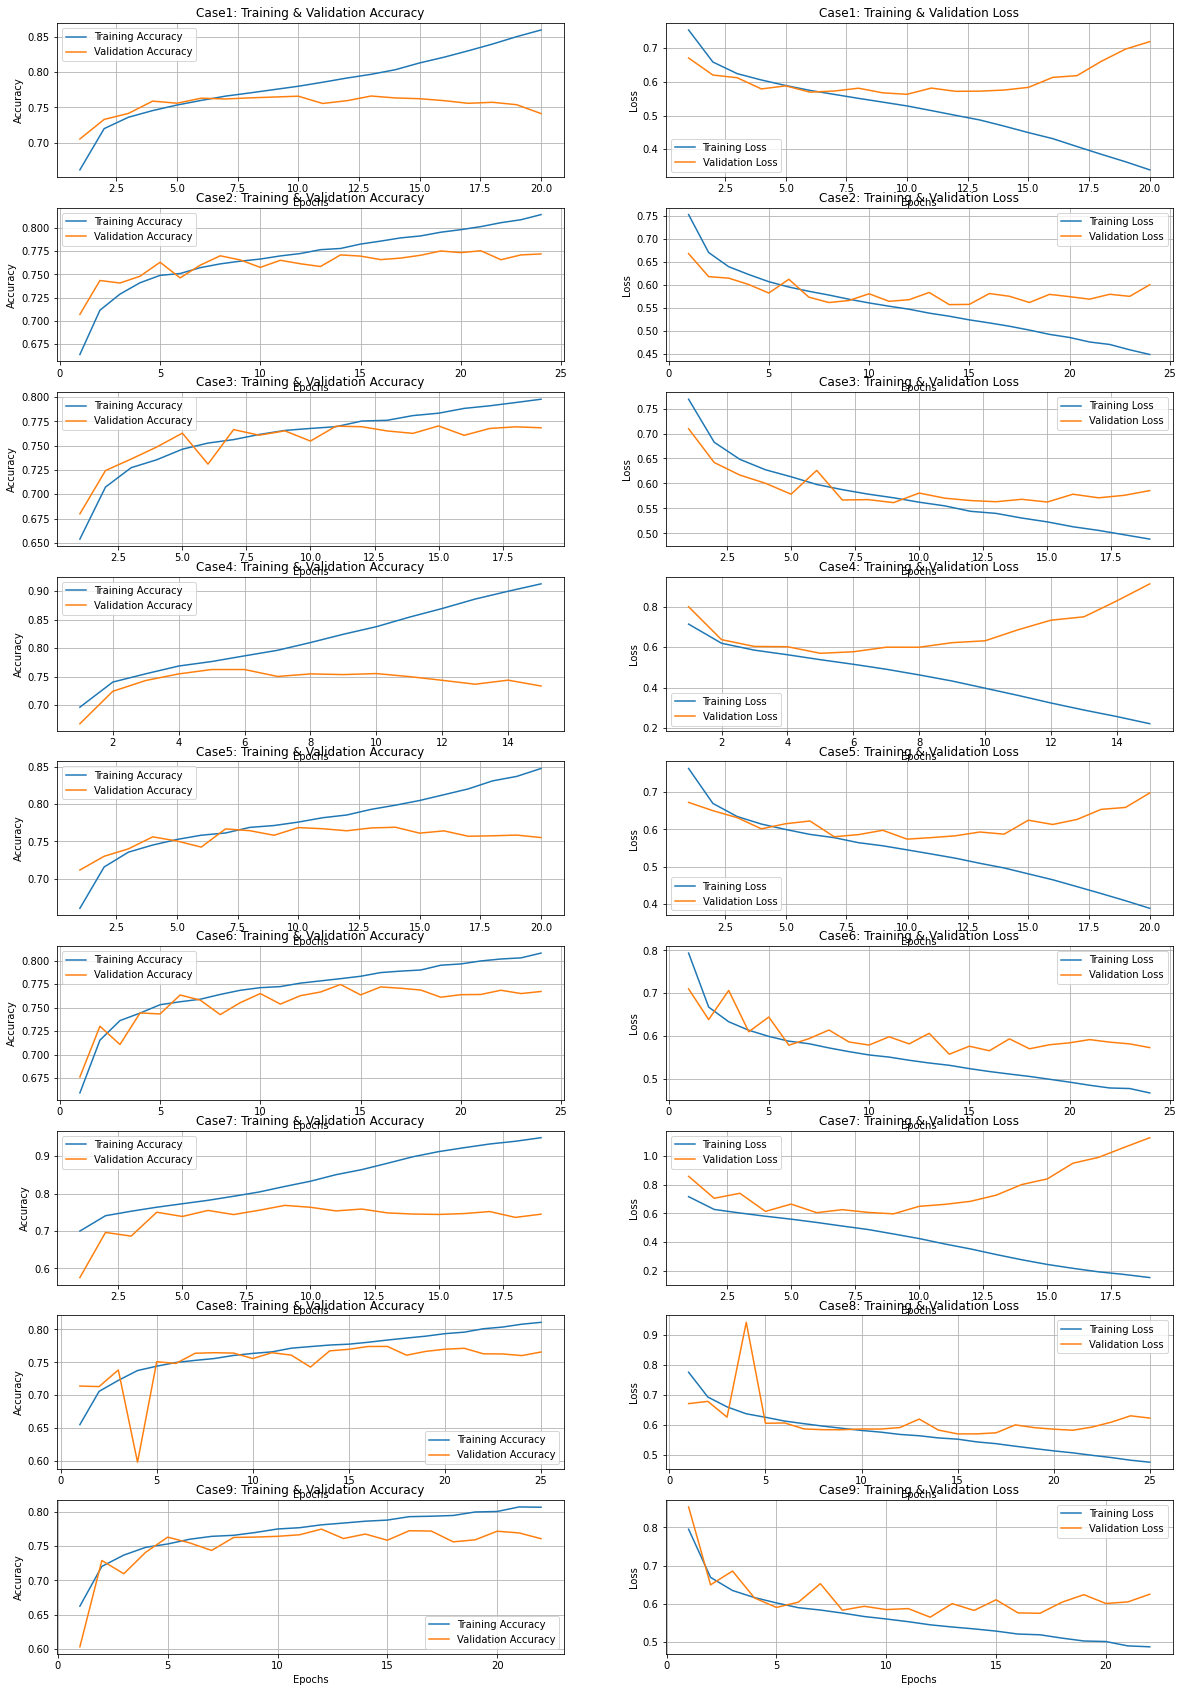

In [ ]:
epochs1 = range(1, len(history1.history['val_accuracy']) + 1)
epochs2 = range(1, len(history2.history['val_accuracy']) + 1)
epochs3 = range(1, len(history3.history['val_accuracy']) + 1)
epochs4 = range(1, len(history4.history['val_accuracy']) + 1)
epochs5 = range(1, len(history5.history['val_accuracy']) + 1)
epochs6 = range(1, len(history6.history['val_accuracy']) + 1)
epochs7 = range(1, len(history7.history['val_accuracy']) + 1)
epochs8 = range(1, len(history8.history['val_accuracy']) + 1)
epochs9 = range(1, len(history9.history['val_accuracy']) + 1)
#
epochs10 = range(1, len(history1.history['val_loss']) + 1)
epochs11 = range(1, len(history2.history['val_loss']) + 1)
epochs12 = range(1, len(history3.history['val_loss']) + 1)
epochs13 = range(1, len(history4.history['val_loss']) + 1)
epochs14 = range(1, len(history5.history['val_loss']) + 1)
epochs15 = range(1, len(history6.history['val_loss']) + 1)
epochs16 = range(1, len(history7.history['val_loss']) + 1)
epochs17 = range(1, len(history8.history['val_loss']) + 1)
epochs18 = range(1, len(history9.history['val_loss']) + 1)


plt.figure(figsize = (20, 30))

plt.subplot(9, 2, 1)
plt.plot(epochs1, history1.history['accuracy'])
plt.plot(epochs1, history1.history['val_accuracy'])
plt.title('Case1: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 2)
plt.plot(epochs10, history1.history['loss'])
plt.plot(epochs10, history1.history['val_loss'])
plt.title('Case1: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 3)
plt.plot(epochs2, history2.history['accuracy'])
plt.plot(epochs2, history2.history['val_accuracy'])
plt.title('Case2: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 4)
plt.plot(epochs11, history2.history['loss'])
plt.plot(epochs11, history2.history['val_loss'])
plt.title('Case2: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 5)
plt.plot(epochs3, history3.history['accuracy'])
plt.plot(epochs3, history3.history['val_accuracy'])
plt.title('Case3: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 6)
plt.plot(epochs12, history3.history['loss'])
plt.plot(epochs12, history3.history['val_loss'])
plt.title('Case3: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 7)
plt.plot(epochs4, history4.history['accuracy'])
plt.plot(epochs4, history4.history['val_accuracy'])
plt.title('Case4: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 8)
plt.plot(epochs13, history4.history['loss'])
plt.plot(epochs13, history4.history['val_loss'])
plt.title('Case4: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 9)
plt.plot(epochs5, history5.history['accuracy'])
plt.plot(epochs5, history5.history['val_accuracy'])
plt.title('Case5: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 10)
plt.plot(epochs14, history5.history['loss'])
plt.plot(epochs14, history5.history['val_loss'])
plt.title('Case5: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 11)
plt.plot(epochs6, history6.history['accuracy'])
plt.plot(epochs6, history6.history['val_accuracy'])
plt.title('Case6: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 12)
plt.plot(epochs15, history6.history['loss'])
plt.plot(epochs15, history6.history['val_loss'])
plt.title('Case6: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 13)
plt.plot(epochs7, history7.history['accuracy'])
plt.plot(epochs7, history7.history['val_accuracy'])
plt.title('Case7: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 14)
plt.plot(epochs16, history7.history['loss'])
plt.plot(epochs16, history7.history['val_loss'])
plt.title('Case7: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 15)
plt.plot(epochs8, history8.history['accuracy'])
plt.plot(epochs8, history8.history['val_accuracy'])
plt.title('Case8: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 16)
plt.plot(epochs17, history8.history['loss'])
plt.plot(epochs17, history8.history['val_loss'])
plt.title('Case8: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.subplot(9, 2, 17)
plt.plot(epochs9, history9.history['accuracy'])
plt.plot(epochs9, history9.history['val_accuracy'])
plt.title('Case9: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(9, 2, 18)
plt.plot(epochs18, history9.history['loss'])
plt.plot(epochs18, history9.history['val_loss'])
plt.title('Case9: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.show()
# 3, 6, 8, 9번 모델은 과적합 경향이 없다.

> ### 6) Predict

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.7106 - accuracy: 0.7355
Loss = 0.71062
Accuracy = 0.73548


In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 7ms/step - loss: 0.5897 - accuracy: 0.7633
Loss = 0.58967
Accuracy = 0.76328


In [ ]:
loss, accuracy = model3.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.5876 - accuracy: 0.7658
Loss = 0.58760
Accuracy = 0.76576


In [ ]:
loss, accuracy = model4.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.9568 - accuracy: 0.7286
Loss = 0.95681
Accuracy = 0.72860


In [ ]:
loss, accuracy = model5.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.6898 - accuracy: 0.7561
Loss = 0.68984
Accuracy = 0.75612


In [ ]:
loss, accuracy = model6.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.5711 - accuracy: 0.7630
Loss = 0.57115
Accuracy = 0.76301


In [ ]:
loss, accuracy = model7.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 1.1558 - accuracy: 0.7344
Loss = 1.15582
Accuracy = 0.73438


In [ ]:
loss, accuracy = model8.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.6276 - accuracy: 0.7641
Loss = 0.62762
Accuracy = 0.76411


In [ ]:
loss, accuracy = model9.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 10ms/step - loss: 0.6095 - accuracy: 0.7622
Loss = 0.60948
Accuracy = 0.76218


In [ ]:
df_result = pd.DataFrame({"Model" : ['1:Stacked', '2:Drop', '3:Drop+Stacked', '4:Batch+Stacked', 
                                     '5:L2+Stacked', '6:Batch+Drop+Stacked', '7:Batch+L2+Stacked',
                                     '8:Drop+L2+Stacked', '9:Drop+L2+Batch+Stacked'],                      
                          "Valid_Accuracy" : ['0.7660','0.7755','0.7704','0.7623','0.7689',
                                             '0.7747','0.7684','0.7741','0.7745'],
                          "Test_Accuracy" : ['0.7355','0.7633','0.7658','0.7286','0.7561',
                                             '0.7630','0.7344','0.7641','0.7622']})
                          
df_result.sort_values(by=['Test_Accuracy'], axis=0, ascending = False)


,Model,Valid_Accuracy,Test_Accuracy
2,3:Drop+Stacked,0.7704,0.7658
7,8:Drop+L2+Stacked,0.7741,0.7641
1,2:Drop,0.7755,0.7633
5,6:Batch+Drop+Stacked,0.7747,0.7630
8,9:Drop+L2+Batch+Stacked,0.7745,0.7622
4,5:L2+Stacked,0.7689,0.7561
0,1:Stacked,0.7660,0.7355
6,7:Batch+L2+Stacked,0.7684,0.7344
3,4:Batch+Stacked,0.7623,0.7286


**결론**: Dropout 모델이 가장 높게 나와서 Drop 비율을 0.2 ~ 0.6까지 다르게 적용해봤는데, 0.5보다 클 때는 없었다. 

## Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model3.save('/content/drive/My Drive/Colab Notebooks/models/BiLSTM_model_03.h5')

In [ ]:
y_pred = model3.predict(X_test)
y_pred_final = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
cnt = [0, 0, 0]

for i in range(len(y_test)):
  if y_pred_final[i] != y_true[i]:
    print(f'pred: {y_pred_final[i]} / answer: {y_true[i]}')
    n = y_pred_final[i]
    cnt[n] += 1

print('\n', cnt)
print(len(y_test))

# 긍정(0)을 가장 많이 틀렸고, 중립(2)을 가장 많이 맞췄다. 
# 전체 3633개 중 851개 틀렸고, 약 77% 정도 답을 맞춘 것이다. 

pred: 1 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 2
pred: 1 / answer: 2
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 2 / answer: 0
pred: 0 / answer: 1
pred: 2 / answer: 0
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 2
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 0 / answer: 2
pred: 0 / answer: 2
pred: 1 / answer: 2
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 1 / answer: 2
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 2
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 2 / answer: 1
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 0 / answer: 2
pred: 2 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 2 / answer: 0
